# Problem Statement:

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
# Importing Libraries for EDA and data preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the train dataset

loan_train = pd.read_csv("D:/04 Data Science - The Dream/Projects/Project 2 - Loan Eligibility/loan-train.csv")

# Overview of dataset

(loan_train.head(15))


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Checking the shape of the dataset

loan_train.shape

(614, 13)

There are 614 records and 13 attributes

In [4]:
# Basic Information and the dtypes of dataset

loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Understanding basic statistical charecteristics

loan_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Only for analysis puprpose the following attributes are considered as value in INR as the unit is not mentioned

1. Mean and median are largely spread therefore indicating the skewness in the data
2. Attributes "ApplicantIncome", "CoapplicantIncome", "LoanAmount" seems right skewed
3. Attributes "Loan_Amount_Term" & "Credit_History" seems left skewed

In [6]:
# Checking for null values percentage rounded off to two digits

round(loan_train.isnull().sum()/len(loan_train)*100, 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

Out of 13 attributes 7 has null values. 

Credit_History has highest % of null values

In [7]:
# Unique values in every attribute

loan_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Feature Engineering

In [8]:
loan_train["Total_Income"] = loan_train["ApplicantIncome"] + loan_train["CoapplicantIncome"]

In [9]:
loan_train["Income_to_Loan %"] = round((loan_train["LoanAmount"])/(loan_train["Total_Income"])*100, 2)

In [10]:
# Overview after adding attributes

loan_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan %
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,2.10
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,2.20
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,2.43
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,2.35
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,2.78
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0,2.47
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0,2.85
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0,3.04
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0,1.47


In [11]:
loan_train["Income_to_Loan %"].max()

8.27

In [12]:
loan_train["Income_to_Loan %"].min()

0.25

In [13]:
loan_train["Income_to_Loan %"].mean()

2.375439189189192

In [14]:
loan_train["Income_to_Loan %"].median()

2.41

The maximum percentag of loan amount santioned for an individual is only 8% approx. of Total_income (Applicant + Coapplicant income) and minimum percentage is 0.25% which seems very less

So getting higher amount loan santion is difficult in this finance company 

Also, Please note

Mean % & Median % of loan santioned to a individual is approx 2.4 %. This might become handy information for imputing missing values

# EDA

In [15]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Income_to_Loan %'],
      dtype='object')

In [16]:
# Gender Attribute Analysis

loan_train["Gender"].value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [17]:
round(loan_train["Gender"].value_counts(dropna = False)/len(loan_train["Gender"])*100, 2)

Male      79.64
Female    18.24
NaN        2.12
Name: Gender, dtype: float64

79.64 % of Male applicants have applied and received Loan

2.12% of applicants gender is unknown. We may impute this with mode values of "Gender"

In [18]:
# Married Attribute Analysis

loan_train["Married"].value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [19]:
round(loan_train["Married"].value_counts(dropna = False)/len(loan_train["Married"])*100, 2)

Yes    64.82
No     34.69
NaN     0.49
Name: Married, dtype: float64

Majority i.e., 64.82% of married couples have applied and received loan 

In [20]:
# Education Attribute Analysis

loan_train["Education"].value_counts(dropna = False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [21]:
round(loan_train["Education"].value_counts(dropna = False)/len(loan_train["Education"])*100, 2)

Graduate        78.18
Not Graduate    21.82
Name: Education, dtype: float64

Mostly around 78% of individuals who received loan are gradutes. Therefore graduates are most likely to recive loan

In [22]:
# Employment Analysis

loan_train["Self_Employed"].value_counts(dropna = False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [23]:
round(loan_train["Self_Employed"].value_counts(dropna = False)/len(loan_train["Self_Employed"])*100, 2)

No     81.43
Yes    13.36
NaN     5.21
Name: Self_Employed, dtype: float64

Receiving loan as Self employed individual is difficult in this finance company as people who are working in companies are preferred

In [24]:
# Area Analysis

loan_train["Property_Area"].value_counts(dropna = False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
round(loan_train["Property_Area"].value_counts(dropna = False)/len(loan_train["Property_Area"])*100, 2)

Semiurban    37.95
Urban        32.90
Rural        29.15
Name: Property_Area, dtype: float64

Loans recevied is spread evenly across different areas therefore this may not be the constraint to apply and receive loans for Dream Housing Finance Company

We can drop this attribute

In [26]:
# Dependents Analysis

loan_train["Dependents"].value_counts(dropna = False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [27]:
round(loan_train["Dependents"].value_counts(dropna = False)/len(loan_train["Dependents"])*100, 2)

0      56.19
1      16.61
2      16.45
3+      8.31
NaN     2.44
Name: Dependents, dtype: float64

Individuals with fewer nos of dependents are more likely to receive the loan

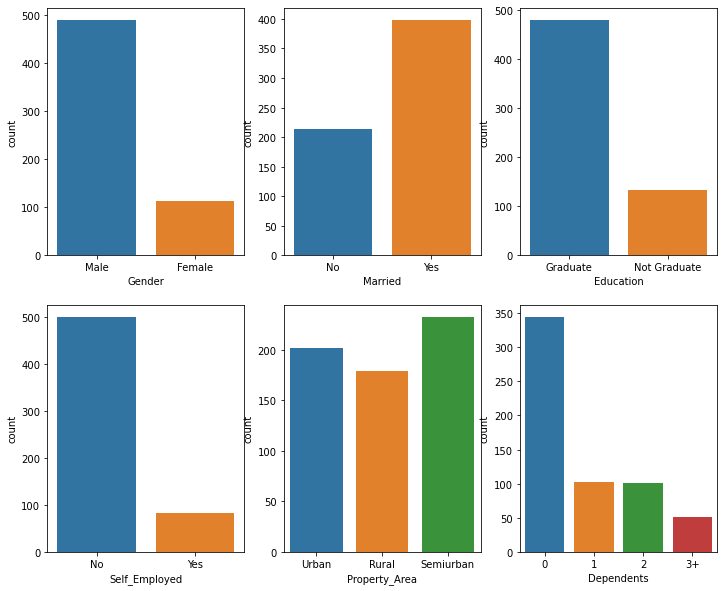

In [28]:
fig, ax = plt.subplots(2,3, figsize = (12,10))
sns.countplot(loan_train["Gender"], ax = ax[0,0])
sns.countplot(loan_train["Married"], ax = ax[0,1])
sns.countplot(loan_train["Education"], ax = ax[0,2])
sns.countplot(loan_train["Self_Employed"], ax = ax[1,0])
sns.countplot(loan_train["Property_Area"], ax = ax[1,1])
sns.countplot(loan_train["Dependents"], ax = ax[1,2])
plt.show()

It is evident that an Individual who is male, married, graduated, non self-employed and has no dependents shall recieve loan more easily than others

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

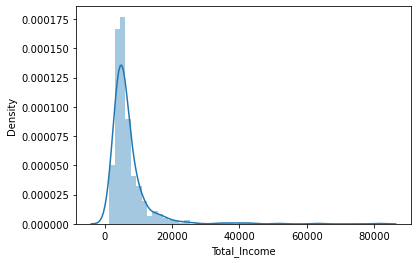

In [29]:
sns.distplot(loan_train["Total_Income"])

Income of Individuals applied and received loan are right skewed

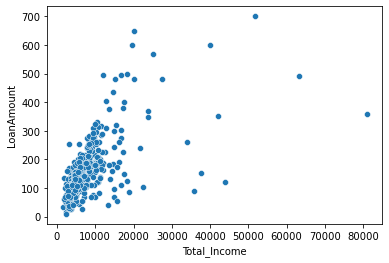

In [30]:
sns.scatterplot(data = loan_train, x = "Total_Income", y = "LoanAmount")
plt.show()

Above plot indicates that majority of loans applied and received are individuals with income less than 20000

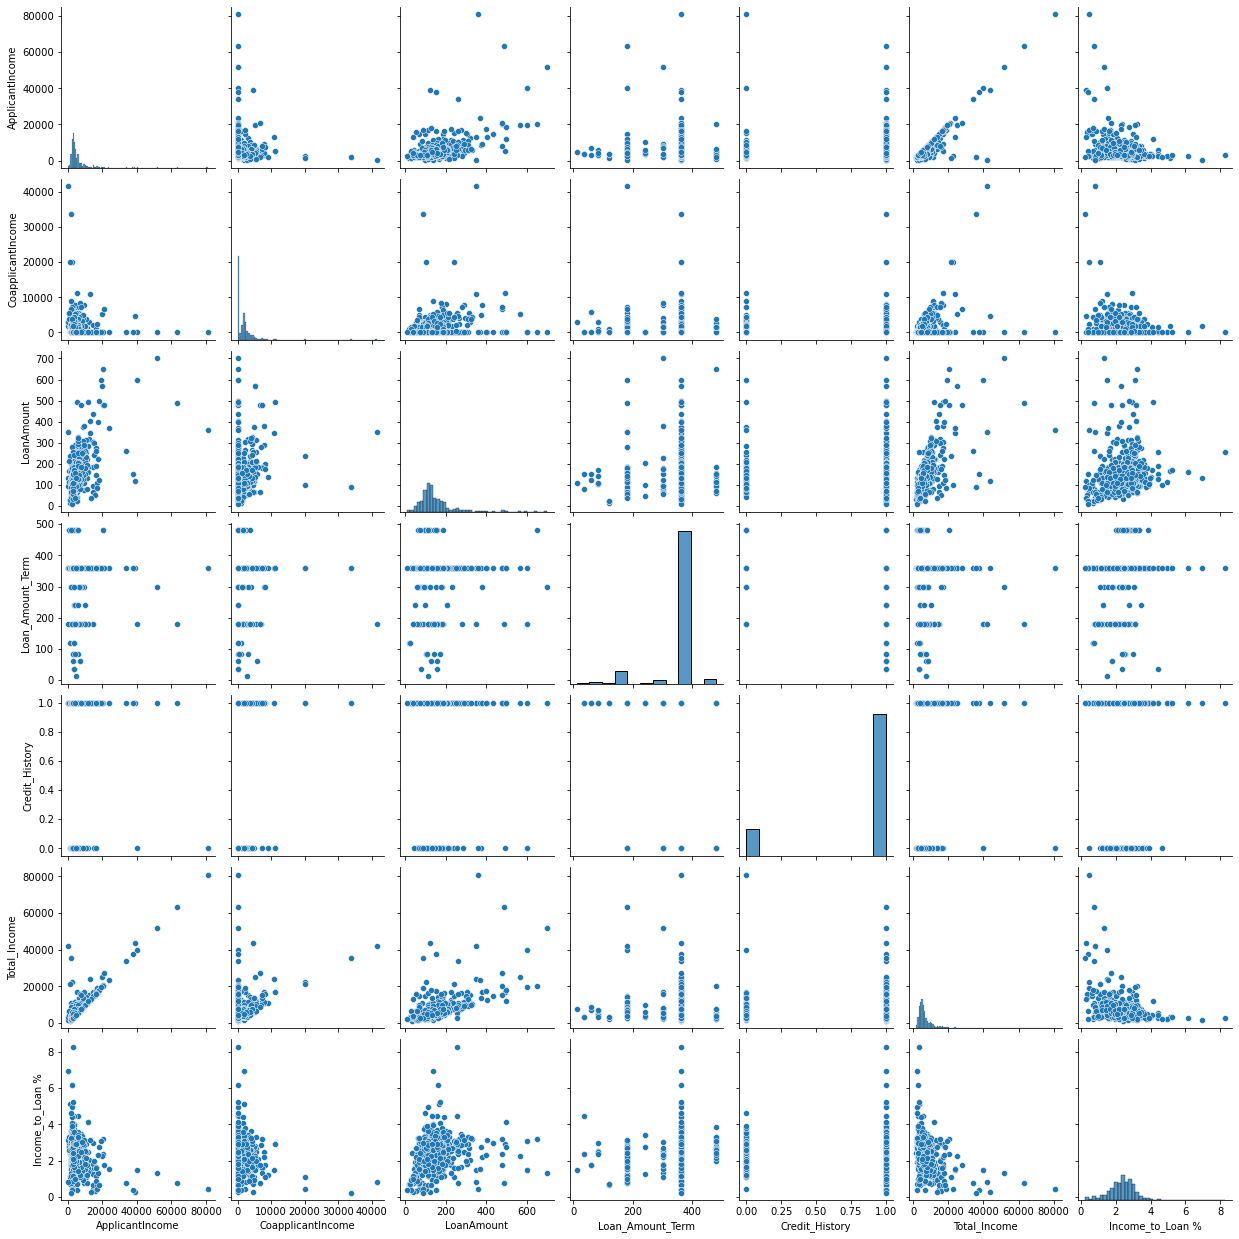

In [31]:
sns.pairplot(data = loan_train)

In [32]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Income_to_Loan %     22
dtype: int64

# Missing Value Treatment

In [33]:
# Gender Attribute

loan_train["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [34]:
loan_train["Gender"].fillna("Male", inplace = True)

In [35]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Income_to_Loan %     22
dtype: int64

In [36]:
# Married Attribute

loan_train["Married"].mode()

0    Yes
Name: Married, dtype: object

In [37]:
loan_train["Married"].fillna("Yes", inplace = True)

In [38]:
# Dependents Attribute

loan_train["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [39]:
loan_train["Dependents"].fillna(0, inplace = True)

In [40]:
# Employment Attribute

loan_train["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [41]:
loan_train["Self_Employed"].fillna("No", inplace = True)

In [42]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Income_to_Loan %     22
dtype: int64

In [43]:
# Loan amount can be imputed with hrlp of Total_income attribute

# Reffering to our above code we can consider loan amount as 2.4% of Total_Income

loan_train["LoanAmount"].loc[loan_train["LoanAmount"].isnull()]



0     NaN
35    NaN
63    NaN
81    NaN
95    NaN
102   NaN
103   NaN
113   NaN
127   NaN
202   NaN
284   NaN
305   NaN
322   NaN
338   NaN
387   NaN
435   NaN
437   NaN
479   NaN
524   NaN
550   NaN
551   NaN
605   NaN
Name: LoanAmount, dtype: float64

In [44]:
loan_train[loan_train["LoanAmount"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan %
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y,4342.0,NaN
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N,4945.0,NaN
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y,2395.0,NaN
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N,6782.0,NaN
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,13650.0,NaN
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y,8235.0,NaN
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y,7451.0,NaN
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y,5505.0,NaN
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N,3992.0,NaN


In [45]:
# Dropping records where loan amount is null and loan status is No

loan_train = (loan_train[~((loan_train["LoanAmount"].isna()) & (loan_train["Loan_Status"] == "N"))])

In [46]:
loan_train.shape

(603, 15)

In [47]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
Total_Income          0
Income_to_Loan %     11
dtype: int64

In [48]:
(loan_train[((loan_train["LoanAmount"].isna()) & (loan_train["Loan_Status"] == "Y"))])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan %
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y,4342.0,NaN
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y,2395.0,NaN
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,13650.0,NaN
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y,8235.0,NaN
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y,7451.0,NaN
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y,5505.0,NaN
322,LP002054,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural,Y,5191.0,NaN
435,LP002393,Female,Yes,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,10047.0,NaN
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban,Y,3338.0,NaN


In [49]:
# Imputing Loan Amount with Loan status "Yes" as Total Income * mean/ median % of Loan / Total Income (2.4%)

loan_train["LoanAmount"] = loan_train.apply(lambda x : x["Total_Income"] * (2.4/100) 
                                            if pd.isnull(x["LoanAmount"]) 
                                            else x["LoanAmount"], axis = 1)

In [50]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
Total_Income          0
Income_to_Loan %     11
dtype: int64

In [51]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan %
0,LP001002,Male,No,0,Graduate,No,5849,0.0,140.376,360.0,1.0,Urban,Y,5849.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000,360.0,1.0,Rural,N,6091.0,2.10
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000,360.0,1.0,Urban,Y,3000.0,2.20
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000,360.0,1.0,Urban,Y,4941.0,2.43
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000,360.0,1.0,Urban,Y,6000.0,2.35


In [52]:
loan_train[loan_train["Loan_Amount_Term"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan %
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y,6100.0,1.89
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,3158.0,3.17
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,4695.0,2.04
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,3410.0,2.58
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,4755.0,2.00
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N,7686.0,1.98
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y,6873.0,2.65
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,4272.0,2.81
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y,8588.0,2.04
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y,5787.0,2.07


Since Individuals have received loan, there has to be an loan amount term. We can impute the same with mode value

In [53]:
mode = loan_train["Loan_Amount_Term"].mode().values[0]
mode
loan_train["Loan_Amount_Term"].fillna(mode, inplace = True)

In [54]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
Total_Income          0
Income_to_Loan %     11
dtype: int64

In [55]:
loan_train[loan_train["Credit_History"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan %
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,3596.0,2.78
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N,6642.0,2.27
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N,7535.0,2.67
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y,2400.0,3.12
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y,5499.0,2.36
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N,8250.0,3.21
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y,5333.0,1.86
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y,3612.0,2.35
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y,3692.0,2.52
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N,8649.0,2.10


In [56]:
loan_train["Credit_History"].unique()

array([ 1.,  0., nan])

In [57]:
loan_train.loc[loan_train["Credit_History"] == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_to_Loan %
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0,2.85
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,3510.0,2.17
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,7660.0,1.36
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N,4511.0,2.57
23,LP001050,Male,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,5282.0,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,Male,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N,5297.0,2.57
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N,4704.0,3.10
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N,2726.0,3.89
597,LP002943,Male,No,0,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N,2987.0,2.95


Since Individuals with credit history 0 also recived loan. We have to discuss further with stakeholder

Currently we have two options, dropping the NaN record or imputing the same with mode value

As our dataset is small we shall impute the column with mode value i.e. 1

In [58]:
# Imputation of Credit Rating

loan_train["Credit_History"] = loan_train["Credit_History"].fillna(1)

In [59]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income          0
Income_to_Loan %     11
dtype: int64

In [60]:
loan_train.shape

(603, 15)

In [61]:
# Drop Unnecesary columns - Total Income, Income_to Loan %, property area & Loan_ID

loan_train = loan_train.drop(["Loan_ID", "Property_Area", "Total_Income","Income_to_Loan %"], axis = 1 )

In [62]:
loan_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [63]:
loan_train.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,140.376,360.0,1.0,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000,360.0,1.0,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000,360.0,1.0,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000,360.0,1.0,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
598,609,Female,No,0,Graduate,No,2900,0.0,71.000,360.0,1.0,Y
599,610,Male,Yes,3+,Graduate,No,4106,0.0,40.000,180.0,1.0,Y
600,611,Male,Yes,1,Graduate,No,8072,240.0,253.000,360.0,1.0,Y
601,612,Male,Yes,2,Graduate,No,7583,0.0,187.000,360.0,1.0,Y


In [64]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,140.376,360.0,1.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000,360.0,1.0,Y


In [65]:
loan_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [66]:
#loan_train.to_csv("D:/04 Data Science - The Dream/Projects/Project 2 - Loan Eligibility/loan_train_cleaned.csv")

# Data Prprocessing

In [67]:
# Encoding attributes

loan_train.replace({"Gender" : {"Male" : 1, "Female" : 0},
                    "Married" : {"Yes" : 1, "No" : 0}, 
                    "Education" : {"Graduate" : 1, "Not Graduate" : 0},
                   "Self_Employed" : {"Yes" : 1, "No" : 0},
                   "Loan_Status" : {"Y" : 1, "N" : 0}}, inplace = True)

In [68]:
loan_train["Dependents"] = loan_train["Dependents"].astype(str)

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

In [71]:
loan_train["Dependents"] = le.fit_transform(loan_train["Dependents"])

In [72]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,1,0,5849,0.0,140.376,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000,360.0,1.0,1


# Test Dataset 

In [73]:
# Reading the test dataset
loan_test = pd.read_csv("D:/04 Data Science - The Dream/Projects/Project 2 - Loan Eligibility/loan-test.csv")

# Overview of test dataset
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [74]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [75]:
loan_test.shape

(367, 12)

There are 367 records and 12 attributes

In [76]:
loan_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


Only for analysis puprpose the following attributes are considered as value in INR as the unit is not mentioned

1. Mean and median are largely spread therefore indicating the skewness in the data
2. Attributes "ApplicantIncome", "CoapplicantIncome", "LoanAmount" seems right skewed
3. Attributes "Loan_Amount_Term" & "Credit_History" seems left skewed

In [77]:
# Checking for percentage of null values

round(loan_test.isnull().sum()/len(loan_test)*100, 2)

Loan_ID              0.00
Gender               3.00
Married              0.00
Dependents           2.72
Education            0.00
Self_Employed        6.27
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           1.36
Loan_Amount_Term     1.63
Credit_History       7.90
Property_Area        0.00
dtype: float64

Test dataset follows same trend as train dataset with "Credit_History" attribute having majority of null values

However train dataset had 7 attributes with null values, whereas test dataset has 6 attributes with null values.

In [78]:
# Checking the number of unique variables 

loan_test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

# Feature Engineering - Test Dataset

In [79]:
# Creating new attributes Total_Income and Loan to Total Income % to check their corelation 

loan_test["Total_Income"] = loan_test.apply(lambda x : x["ApplicantIncome"] + x["CoapplicantIncome"], axis = 1)
loan_test["Income_to_Loan %"] = loan_test.apply(lambda x : round((x["LoanAmount"] / x["Total_Income"])*100,2), axis = 1)

In [80]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Income_to_Loan %
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,1.92
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,2.75
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,3.06
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4886,2.05
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,2.38


In [81]:
# Max, Min, Mean, Median of loans provided w.r.t total income

print("Min Loan_to_Income_% =", loan_test["Income_to_Loan %"].min())
print("Max Loan_to_Income_% =", loan_test["Income_to_Loan %"].max())
print("Average Loan_to_Income_% =", loan_test["Income_to_Loan %"].mean())
print("Median Loan_to_Income_% =", loan_test["Income_to_Loan %"].median())

Min Loan_to_Income_% = 0.19
Max Loan_to_Income_% = 10.23
Average Loan_to_Income_% = 2.446049723756905
Median Loan_to_Income_% = 2.43


The maximum percentag of loan amount santioned for an individual is only 10% approx. of Total_income (Applicant + Coapplicant income) and minimum percentage is 0.19% which seems very less

So getting higher amount loan santion is difficult in the Dream finance company 

Also, Please note

Mean % & Median % of loan santioned to a individual is approx 2.4 %. This might become handy information for imputing missing values

# EDA - Test Dataset

In [82]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income',
       'Income_to_Loan %'],
      dtype='object')

In [83]:
# Gender Attribute Analysis

loan_test["Gender"].value_counts(dropna = False)

Male      286
Female     70
NaN        11
Name: Gender, dtype: int64

In [84]:
round(loan_test["Gender"].value_counts(dropna = False)/len(loan_test["Gender"])*100, 2)

Male      77.93
Female    19.07
NaN        3.00
Name: Gender, dtype: float64

In [85]:
# Married Attribute Analysis

loan_test["Married"].value_counts(dropna = False)

Yes    233
No     134
Name: Married, dtype: int64

In [86]:
round(loan_test["Married"].value_counts(dropna = False)/len(loan_test["Married"])*100,2)

Yes    63.49
No     36.51
Name: Married, dtype: float64

In [87]:
# Dependents Attribute Analysis

loan_test["Dependents"].value_counts(dropna = False)

0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64

In [88]:
round(loan_test["Dependents"].value_counts(dropna = False)/len(loan_test["Dependents"])*100,2)

0      54.50
2      16.08
1      15.80
3+     10.90
NaN     2.72
Name: Dependents, dtype: float64

In [89]:
# Education Attribute Analysis

loan_test["Education"].value_counts(dropna = False)

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [90]:
round(loan_test["Education"].value_counts(dropna = False)/len(loan_test["Education"])*100,2)

Graduate        77.11
Not Graduate    22.89
Name: Education, dtype: float64

In [91]:
# Employment Attribute Analysis

loan_test["Self_Employed"].value_counts(dropna = False)

No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64

In [92]:
round(loan_test["Self_Employed"].value_counts(dropna = False)/len(loan_test["Self_Employed"])*100,2)

No     83.65
Yes    10.08
NaN     6.27
Name: Self_Employed, dtype: float64

In [93]:
# Area Attribute Analysis

loan_test["Property_Area"].value_counts(dropna = False)

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [94]:
round(loan_test["Property_Area"].value_counts(dropna = False)/len(loan_test["Property_Area"])*100,2)

Urban        38.15
Semiurban    31.61
Rural        30.25
Name: Property_Area, dtype: float64

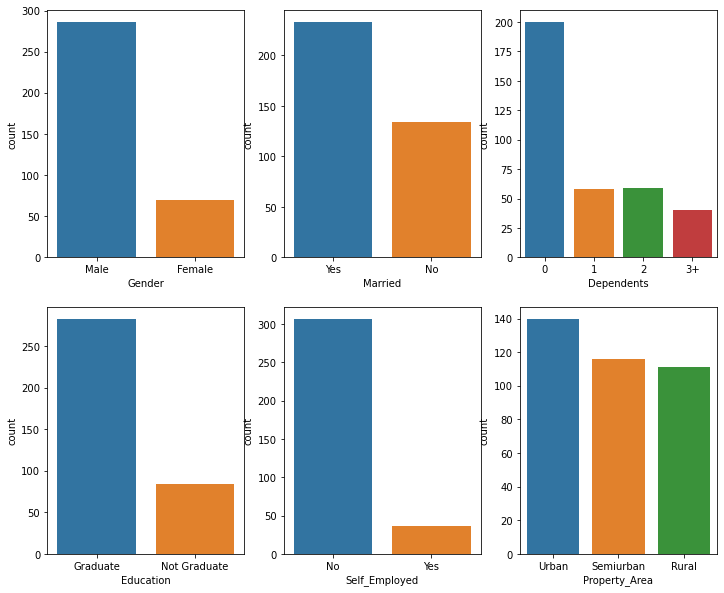

In [95]:
fig, ax = plt.subplots(2,3, figsize = (12,10))
sns.countplot("Gender", data= loan_test, ax = ax[0,0])
sns.countplot("Married", data= loan_test, ax = ax[0,1])
sns.countplot("Dependents", data= loan_test, ax = ax[0,2])
sns.countplot("Education", data= loan_test, ax = ax[1,0])
sns.countplot("Self_Employed", data= loan_test, ax = ax[1,1])
sns.countplot("Property_Area", data= loan_test, ax = ax[1,2])
plt.show()

It is evident that an Individual who is male, married, graduated, non self-employed and has no dependents shall recieve loan more easily than others

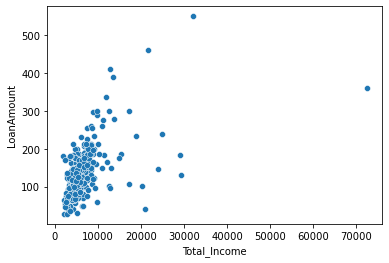

In [96]:
sns.scatterplot(data = loan_test, x = "Total_Income", y = "LoanAmount")
plt.show()

Above plot indicates that majority of loans applied and received are individuals with income less than 20000. Same as train dataset

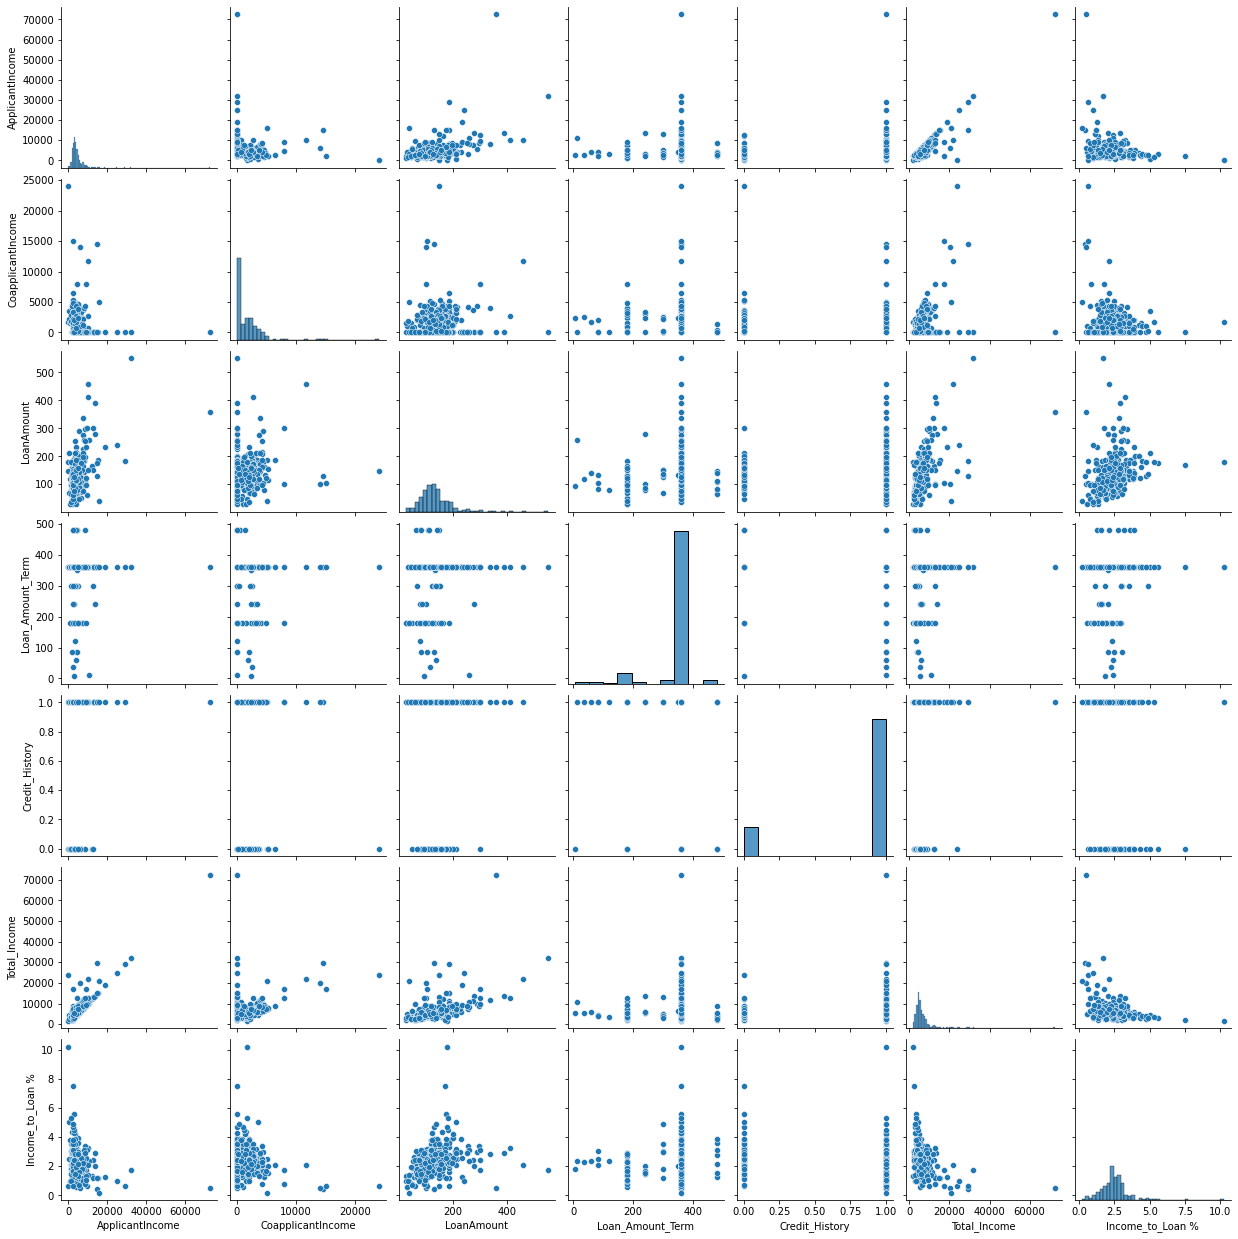

In [97]:
sns.pairplot(data = loan_test)
plt.show()

# Missing Value Treatment - Test Data

In [98]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Total_Income          0
Income_to_Loan %      5
dtype: int64

## Imputing Missing values with mode, similar to the train dataset

In [99]:
mode_G = loan_test["Gender"].mode().values[0]
loan_test["Gender"].fillna(mode_G, inplace = True)

In [100]:
mode_D = loan_test["Dependents"].mode().values[0]
loan_test["Dependents"].fillna(mode_D, inplace = True)

In [101]:
mode_S = loan_test["Self_Employed"].mode().values[0]
loan_test["Self_Employed"].fillna(mode_S, inplace = True)

In [102]:
mode_C = loan_test["Credit_History"].mode().values[0]
loan_test["Credit_History"].fillna(mode_C, inplace = True)

In [103]:
loan_test["Loan_Amount_Term"].mode()


0    360.0
Name: Loan_Amount_Term, dtype: float64

In [104]:
loan_test["Loan_Amount_Term"].fillna(360, inplace = True)

In [105]:
loan_test["LoanAmount"] = loan_test.apply(lambda x : x["Total_Income"] * (2.4/100) 
                                          if pd.isnull(x["LoanAmount"])
                                          else x["LoanAmount"], axis = 1)

In [106]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
Income_to_Loan %     5
dtype: int64

In [107]:
# Dropping unimportant columns

loan_test = loan_test.drop(["Loan_ID", "Property_Area", "Total_Income","Income_to_Loan %"], axis = 1 )

In [108]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0


In [109]:
#loan_test.to_csv("D:/04 Data Science - The Dream/Projects/Project 2 - Loan Eligibility/loan_test_cleaned.csv")

# Data Preprocessing - Test Dataset

In [110]:
# Encoding attributes

loan_test.replace({"Gender" : {"Male" : 1, "Female" : 0},
                    "Married" : {"Yes" : 1, "No" : 0}, 
                    "Education" : {"Graduate" : 1, "Not Graduate" : 0},
                   "Self_Employed" : {"Yes" : 1, "No" : 0},
                   "Loan_Status" : {"Y" : 1, "N" : 0}}, inplace = True)

In [111]:
loan_test["Dependents"] = loan_test["Dependents"].astype(str)

In [112]:
loan_test["Dependents"] = le.fit_transform(loan_test["Dependents"])

In [113]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,1,0,5720,0,110.0,360.0,1.0
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0
4,1,0,0,0,0,3276,0,78.0,360.0,1.0


In [114]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,1,0,5849,0.0,140.376,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000,360.0,1.0,1


# Model Build

In [115]:
# Importing Necessary libraries to build model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [116]:
# Splitting the Independent and Dependent variables

X = loan_train.drop(["Loan_Status"], axis = 1)
y = loan_train["Loan_Status"]

In [117]:
# Trai Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 20)

# Model - Logistic Regression

In [118]:
# Creating the model

model_1 = LogisticRegression()

In [119]:
# Model Fit

model_1.fit(X_train, y_train)

LogisticRegression()

In [120]:
# Model Prediction

y_pred_1 = model_1.predict(X_test)

In [121]:
acc_score_1 = accuracy_score(y_pred_1, y_test)
print("Model Accuracy =", round(acc_score_1*100, 2), "%")

Model Accuracy = 80.11 %


In [122]:
confu_matrix_1 = confusion_matrix(y_pred_1, y_test)
print(confu_matrix_1)

[[ 22   2]
 [ 34 123]]


The above Logistic Regression model is 80.11% accurate.

We shall try for more accuracy with other models

# Model - Decision Tree 

In [123]:
# Importing the model

from sklearn.tree import DecisionTreeClassifier

In [124]:
# Creating the model with necessary hyperparameters

model_2 = DecisionTreeClassifier(criterion = "gini", max_depth= 5, random_state= 2, min_samples_split= 2)

In [125]:
# Model Fit

model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2)

In [126]:
# Model Prediction

y_pred_2 = model_2.predict(X_test)

In [127]:
acc_score_2 = accuracy_score(y_pred_2, y_test)
print("Model Accuracy =", round(acc_score_2*100, 2), "%")

Model Accuracy = 72.38 %


In [128]:
confu_matrix_2 = confusion_matrix(y_pred_2, y_test)
print(confu_matrix_2)

[[ 16  10]
 [ 40 115]]


The above Decision Tree Classifier model is 72.38% accurate.

We shall try for more accuracy with Hyperparameter Tuning


## Hyperparameter Tuning

In [129]:
# Importing Library for Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

In [130]:
# Defining Parameters
parameters_1 = {"criterion": ["gini", "entropy"],
              "max_depth" : [1,2,3,4,5,6,7,8],
              "min_samples_split" : [1,2,3,4,5,6,7,8]}

In [131]:
gs_cv_1 = GridSearchCV(model_2, parameters_1, scoring= "accuracy", cv = 5)

In [132]:
# Fitting model for hyperparameter tuning

gs_cv_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [133]:
gs_cv_1.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [134]:
# Model Building using inputs of hyperparameter tuning

model_2_1 = DecisionTreeClassifier(criterion = "entropy", max_depth= 2, random_state= 2, min_samples_split=2)

In [135]:
# Fitting the tuned model

model_2_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=2)

In [136]:
# Tuned model prediction

y_pred_2_1 = model_2_1.predict(X_test)

In [137]:
acc_score_2_1 = accuracy_score(y_pred_2_1, y_test)
print("Model Accuracy =", round(acc_score_2_1*100, 2), "%")

Model Accuracy = 80.66 %


In [138]:
confu_matrix_2_1 = confusion_matrix(y_pred_2_1, y_test)
print(confu_matrix_2_1)

[[ 23   2]
 [ 33 123]]


The above Decision Tree Classifier model is 80.66% accurate after hyperparameter tuning.

We shall try for more accuracy with other models

# Model - Random Forest Classifier

In [139]:
# Importing the model

from sklearn.ensemble import RandomForestClassifier

In [140]:
# Creating the model with necessary hyperparameters

model_3 = RandomForestClassifier(n_estimators= 10, 
                                 criterion="entropy", 
                                 max_depth= 2, 
                                 random_state=2, 
                                 min_samples_split=2)

In [141]:
# Model fit

model_3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10,
                       random_state=2)

In [142]:
# Model Prediction

y_pred_3 = model_3.predict(X_test)

In [143]:
acc_score_3 = accuracy_score(y_pred_3, y_test)
print("Model Accuracy =", round(acc_score_3*100, 2), "%")

Model Accuracy = 81.22 %


In [144]:
confu_matrix_3 = confusion_matrix(y_pred_3, y_test)
print(confu_matrix_3)

[[ 23   1]
 [ 33 124]]


The above Random Forest Classifier model is 81.22% accurate.

We shall try for more accuracy with Hyperparameter Tuning

## Hyperparameter Tuning

In [145]:
# Defining Parameters

parameters_2 = {"n_estimators" : [10,50,100,200],
                'max_features': ['auto', 'sqrt', 'log2'],
                "criterion" : ["gini", "entropy"], 
                "max_depth" : [1,2,3,4,5,6,7,8,9,10],
               "min_samples_split" : [1,2,3,4,5,6,7,8,9,10]}

In [146]:
gs_cv_2 = GridSearchCV(model_3, parameters_2, scoring= "accuracy")

In [147]:
# Fitting model for hyperparameter tuning

gs_cv_2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              n_estimators=10, random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [148]:
gs_cv_2.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 200}

In [149]:
# Model Building using inputs of hyperparameter tuning

model_3_1 = RandomForestClassifier(n_estimators= 200, 
                                 criterion="gini", 
                                 max_depth= 5, 
                                 random_state=2, 
                                 min_samples_split=3,
                                 )

In [150]:
# Tuned Model Fitting 

model_3_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200,
                       random_state=2)

In [151]:
# Tuned Model Prediction

y_pred_3_1 = model_3_1.predict(X_test)

In [152]:
acc_score_3_1 = accuracy_score(y_pred_3_1, y_test)
print("Model Accuracy =", round(acc_score_3_1*100, 2), "%")

Model Accuracy = 81.22 %


In [153]:
confu_matrix_3_1 = confusion_matrix(y_pred_3_1, y_test)
print(confu_matrix_3_1)

[[ 23   1]
 [ 33 124]]


# Conclusion

1. Model accuracy stands 81.22 % when trained and predicted under Random Forest Classifier.
2. Since the dataset has very less number of records, apparently the accuracy cannot be improved drastically.
3. From above analysis, we can conclude that an individual with below traits should be targetted for providing loan
    a. Male
    b. Married
    c. No dependents
    d. Graduated
    e. Not delf-employed
    f. Good credit history

# Predicting the Loan eligibility for the test dataset

In [154]:
# Assigning test dataset to a variable

z_test = loan_test

In [155]:
# Prediction of testdatset using trained model_3_1, Random Forest Classifier

z_pred = model_3_1.predict(z_test)

In [156]:
z_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [157]:
# Appending Loan Prediction Attributeto our test dataset

loan_test["Loan_prediction"] = z_pred

In [158]:
# Overview of the test dataset after Loan_prediction

loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_prediction
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,1
